In [20]:
import pandas as pd

# Assuming '14484CA85F912-wsense.json' is your JSON file with the full path
data = pd.read_json('wsense-thermocable.json')

# Convert 'time' to datetime for better handling
data['time'] = pd.to_datetime(data['time'])

# Remove specified columns directly
data.drop(columns=['networkId', 'rssi', 'seqNumber'], inplace=True)
# Remove rows with any null values
data.dropna(inplace=True)

# Configure Pandas to display all rows, if desired
pd.set_option('display.max_rows', None)

# Display the DataFrame to verify all rows
display(data)



,roadTemperature,airTemperature,airHumidity,batteryLevel,time,createdAt
0,-70.9,-5.0,93,7.00,2023-12-01 01:02:15,2023-12-01T01:02:17
1,-70.9,-5.7,93,7.00,2023-12-01 01:17:13,2023-12-01T01:17:14
2,-70.9,-6.2,93,7.00,2023-12-01 01:32:10,2023-12-01T01:32:11
3,-70.9,-6.8,93,7.00,2023-12-01 01:47:09,2023-12-01T01:47:10
4,-70.9,-7.2,93,6.95,2023-12-01 02:02:06,2023-12-01T02:02:08
5,-70.9,-7.3,93,6.95,2023-12-01 02:17:00,2023-12-01T02:17:02
6,-70.9,-7.5,93,6.95,2023-12-01 02:31:58,2023-12-01T02:31:59
7,-70.9,-8.0,93,6.95,2023-12-01 02:46:55,2023-12-01T02:46:56
8,-70.9,-8.0,93,6.95,2023-12-01 03:01:51,2023-12-01T03:01:53
9,-70.9,-8.2,93,6.95,2023-12-01 03:16:48,2023-12-01T03:16:49


In [ ]:
#Top five rows in the dataset
data.head()

In [ ]:
#The info() method is useful to get a quick description of the data, in particular the
#total number of rows, each attribute’s type, and the number of nonnull values
data.info()

In [ ]:
 #You can find out what cate‐
#gories exist and how many districts belong to each category by using the
#value_counts() method:
data["airTemperature"].value_counts()

In [ ]:
 #You can find out what cate‐
#gories exist and how many districts belong to each category by using the
#value_counts() method:
data["roadTemperature"].value_counts()

In [ ]:
 #You can find out what cate‐
#gories exist and how many districts belong to each category by using the
#value_counts() method:
data["airHumidity"].value_counts()

In [ ]:
 #You can find out what cate‐
#gories exist and how many districts belong to each category by using the
#value_counts() method:
data["batteryLevel"].value_counts()

In [ ]:
#The describe() method shows a summary of the numerical attributes
data.describe()

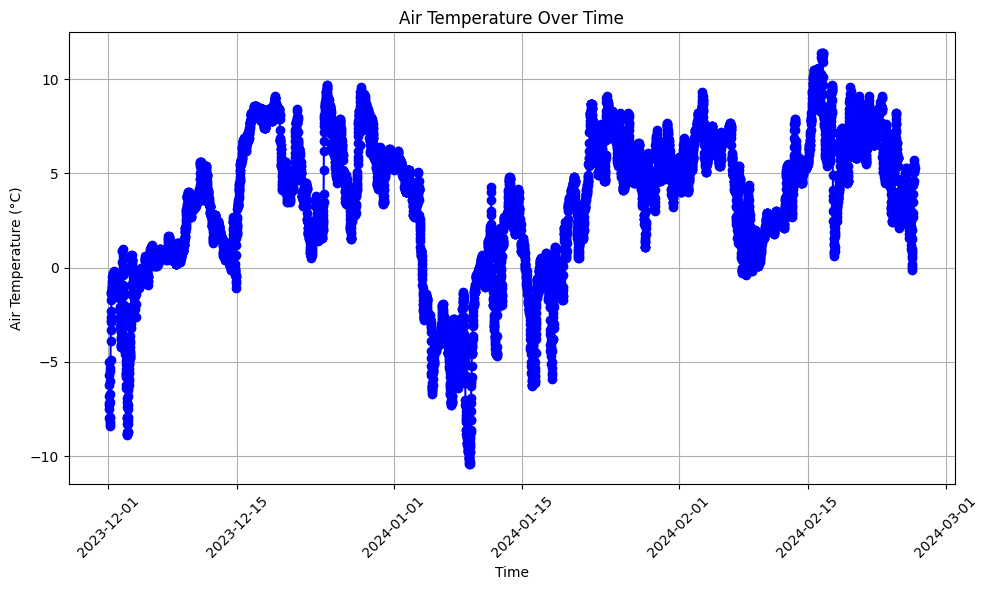

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Load and clean your data here
# Assuming 'data' is your cleaned DataFrame that already has null values removed and necessary columns retained

# Ensure the 'time' column is in datetime format for better plotting
data['time'] = pd.to_datetime(data['time'])

# Start plotting
plt.figure(figsize=(10, 6))
plt.plot(data['time'], data['airTemperature'], marker='o', linestyle='-', color='blue')
plt.title('Air Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Air Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)  # Optional: Adds a grid for better readability
plt.tight_layout()
plt.show()


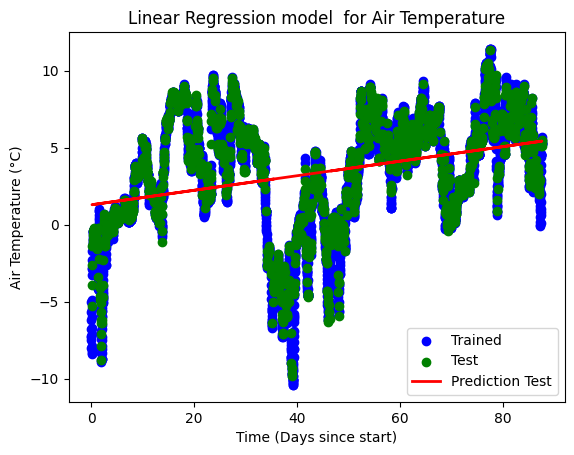

In [4]:
#Create a linear regression model for Air Temperature
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Convert 'time' to a numerical value (e.g., days since the first timestamp)
data['time'] = pd.to_datetime(data['time'])
data['time'] = (data['time'] - data['time'].min()).dt.total_seconds()/(3600.0 *24)

# Prepare the data for linear regression
X = data[['time']]  # Feature matrix
y = data['airTemperature']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)
# Optional: Plot the results
#trained
plt.scatter(X_train, y_train, color='blue',label='Trained')#80%
#Test
plt.scatter(X_test, y_test, color='green',label='Test')#20%
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction Test')  # Predict
#plt.plot(X_train, x_pred, color='orange', linewidth=2,label='Prediction Trained')#predict
plt.xlabel('Time (Days since start)')
plt.ylabel('Air Temperature (°C)')
plt.title('Linear Regression model  for Air Temperature')
plt.legend()# This will show the legend
plt.show()

Mean Squared Error: 0.026256897859327253


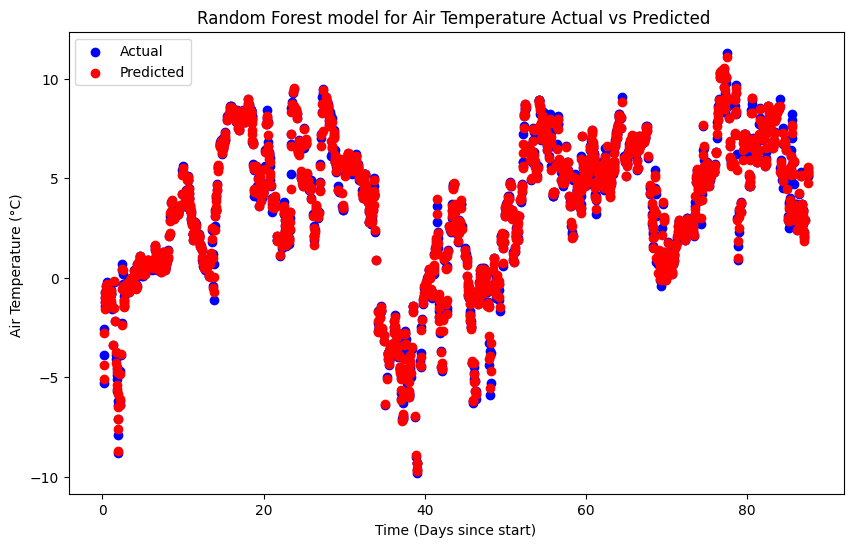

In [5]:
# the Random Forest model for Air Temperature
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt



# Load data
data = pd.read_json('wsense-thermocable.json')  # Update the path to your JSON file

# Convert 'time' to numerical feature, e.g., day of the month
#data['day'] = pd.to_datetime(data['time']).dt.day
data['time'] = pd.to_datetime(data['time'])
data['time'] = (data['time'] - data['time'].min()).dt.total_seconds()/(3600.0 *24)
# Drop rows with NaN values in 'waterLevel'
data = data.dropna(subset=['airTemperature'])

# Define features and target variable
X = data[['time']]  # Now we use 'day' instead of 'hour'
y = data['airTemperature']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
#n_estimators= The required number of trees in the Random Forest. The default value is 100. We can choose any number but need to take care of the overfitting issue.
#criterion= It is a function to analyze the accuracy of the split. Here we have taken "entropy" for the information gain.
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
#print(f"Predict on the trained set: {X_train},{y_train}")
# Predict on the testing set
y_pred = random_forest_model.predict(X_test)

# Calculate the mean squared error (MSE)
#MSE measures the average squared difference between the actual value and the estimated values.
#The lowest possible value for MSE is 0, which would indicate that the model's predictions are perfect and match the actual values
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Calculate the root mean squared error (RMSE) for a more interpretable metric
#rmse = np.sqrt(mse)
#print(f"Root Mean Squared Error: {rmse}")

# After your model has predicted
# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 6))
#plt.scatter(X_train['time'], y_train, color='blue', label='Actual'),#med den
plt.scatter(X_test['time'], y_test, color='blue', label='Actual')#med den
plt.scatter(X_test['time'], y_pred, color='red', label='Predicted')
plt.xlabel('Time (Days since start)')
plt.ylabel('Air Temperature (°C) ')
plt.title('Random Forest model for Air Temperature Actual vs Predicted ')
plt.legend()
plt.show()


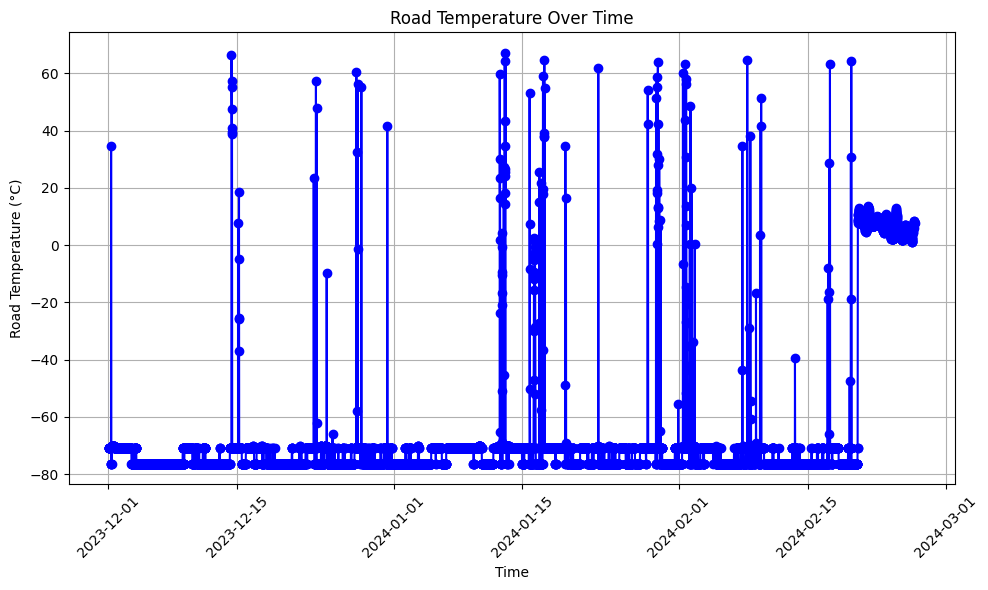

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Load and clean your data here
# Assuming 'data' is your cleaned DataFrame that already has null values removed and necessary columns retained

# Ensure the 'time' column is in datetime format for better plotting
data['time'] = pd.to_datetime(data['time'])

# Start plotting
plt.figure(figsize=(10, 6))
plt.plot(data['time'], data['roadTemperature'], marker='o', linestyle='-', color='blue')
plt.title('Road Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Road Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)  # Optional: Adds a grid for better readability
plt.tight_layout()
plt.show()

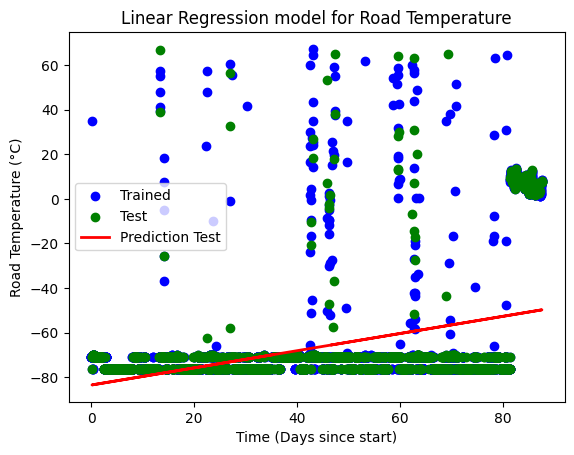

In [9]:
#Create a linear regression model for Road Temperature
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Convert 'time' to a numerical value (e.g., days since the first timestamp)
data['time'] = pd.to_datetime(data['time'])
data['time'] = (data['time'] - data['time'].min()).dt.total_seconds()/(3600.0 *24)

# Prepare the data for linear regression
X = data[['time']]  # Feature matrix
y = data['roadTemperature']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)
# Optional: Plot the results
#trained
plt.scatter(X_train, y_train, color='blue',label='Trained')#80%
#Test
plt.scatter(X_test, y_test, color='green',label='Test')#20%
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction Test')  # Predict
#plt.plot(X_train, x_pred, color='orange', linewidth=2,label='Prediction Trained')#predict
plt.xlabel('Time (Days since start)')
plt.ylabel('Road Temperature (°C)')
plt.title('Linear Regression model for Road Temperature')
plt.legend()# This will show the legend
plt.show()

Mean Squared Error: 109.38044971926602


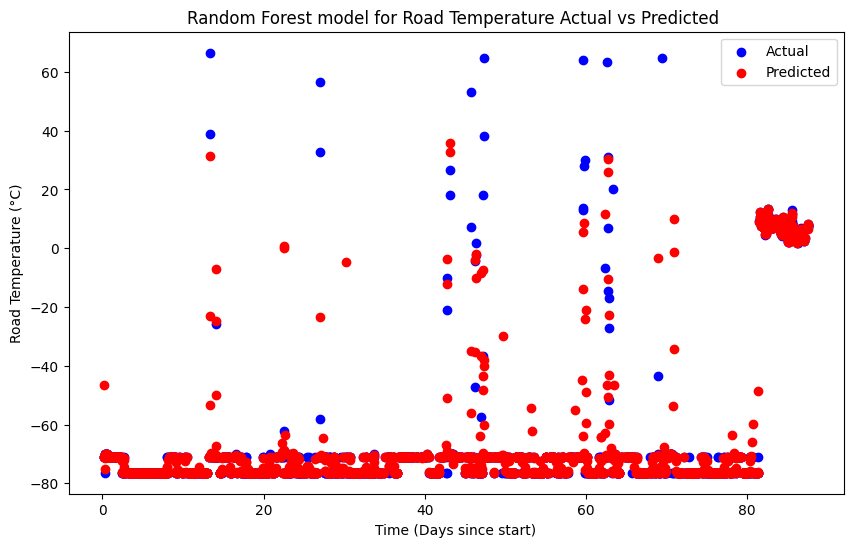

In [11]:
# the Random Forest model for Road Temperature
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt



# Load data
data = pd.read_json('wsense-thermocable.json')  # Update the path to your JSON file

# Convert 'time' to numerical feature, e.g., day of the month
#data['day'] = pd.to_datetime(data['time']).dt.day
data['time'] = pd.to_datetime(data['time'])
data['time'] = (data['time'] - data['time'].min()).dt.total_seconds()/(3600.0 *24)
# Drop rows with NaN values in 'waterLevel'
data = data.dropna(subset=['roadTemperature'])

# Define features and target variable
X = data[['time']]  # Now we use 'day' instead of 'hour'
y = data['roadTemperature']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
#n_estimators= The required number of trees in the Random Forest. The default value is 100. We can choose any number but need to take care of the overfitting issue.
#criterion= It is a function to analyze the accuracy of the split. Here we have taken "entropy" for the information gain.
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
#print(f"Predict on the trained set: {X_train},{y_train}")
# Predict on the testing set
y_pred = random_forest_model.predict(X_test)

# Calculate the mean squared error (MSE)
#MSE measures the average squared difference between the actual value and the estimated values.
#The lowest possible value for MSE is 0, which would indicate that the model's predictions are perfect and match the actual values
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Calculate the root mean squared error (RMSE) for a more interpretable metric
#rmse = np.sqrt(mse)
#print(f"Root Mean Squared Error: {rmse}")

# After your model has predicted
# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 6))
#plt.scatter(X_train['time'], y_train, color='blue', label='Actual'),#med den
plt.scatter(X_test['time'], y_test, color='blue', label='Actual')#med den
plt.scatter(X_test['time'], y_pred, color='red', label='Predicted')
plt.xlabel('Time (Days since start)')
plt.ylabel('Road Temperature (°C)')
plt.title('Random Forest model for Road Temperature Actual vs Predicted ')
plt.legend()
plt.show()


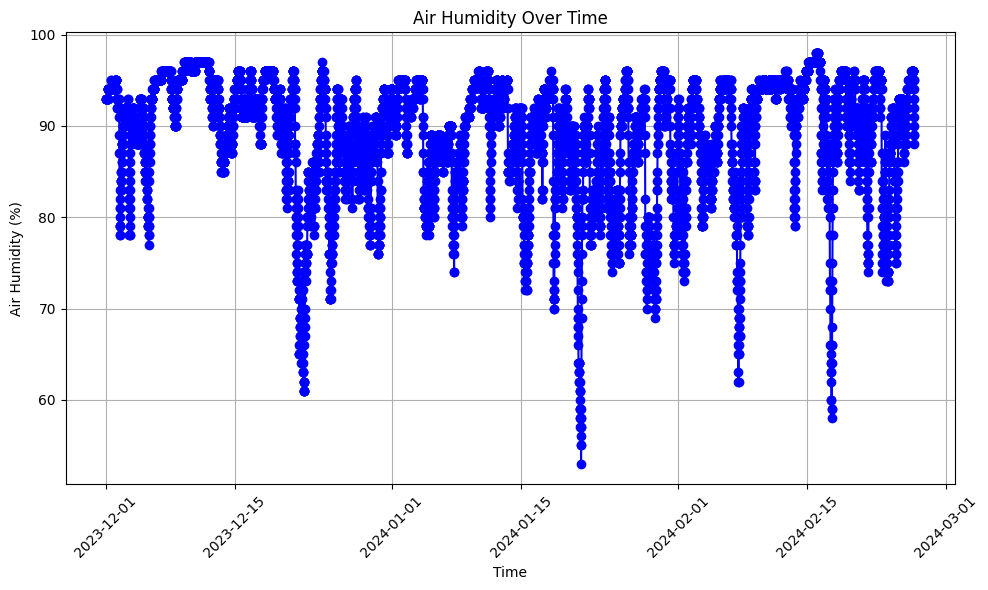

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Load and clean your data here
# Assuming 'data' is your cleaned DataFrame that already has null values removed and necessary columns retained

# Ensure the 'time' column is in datetime format for better plotting
data['time'] = pd.to_datetime(data['time'])

# Start plotting
plt.figure(figsize=(10, 6))
plt.plot(data['time'], data['airHumidity'], marker='o', linestyle='-', color='blue')
plt.title('Air Humidity Over Time')
plt.xlabel('Time')
plt.ylabel('Air Humidity (%)')
plt.xticks(rotation=45)
plt.grid(True)  # Optional: Adds a grid for better readability
plt.tight_layout()
plt.show()

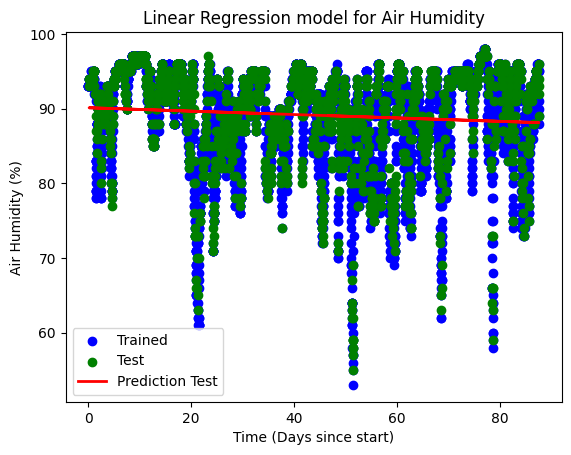

In [23]:
#Create a linear regression model for Air Humidity
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Convert 'time' to a numerical value (e.g., days since the first timestamp)
data['time'] = pd.to_datetime(data['time'])
data['time'] = (data['time'] - data['time'].min()).dt.total_seconds()/(3600.0 *24)

# Prepare the data for linear regression
X = data[['time']]  # Feature matrix
y = data['airHumidity']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)
# Optional: Plot the results
#trained
plt.scatter(X_train, y_train, color='blue',label='Trained')#80%
#Test
plt.scatter(X_test, y_test, color='green',label='Test')#20%
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction Test')  # Predict
#plt.plot(X_train, x_pred, color='orange', linewidth=2,label='Prediction Trained')#predict
plt.xlabel('Time (Days since start)')
plt.ylabel('Air Humidity (%)')
plt.title('Linear Regression model for Air Humidity')
plt.legend()# This will show the legend
plt.show()

Mean Squared Error: 0.4471133333333334


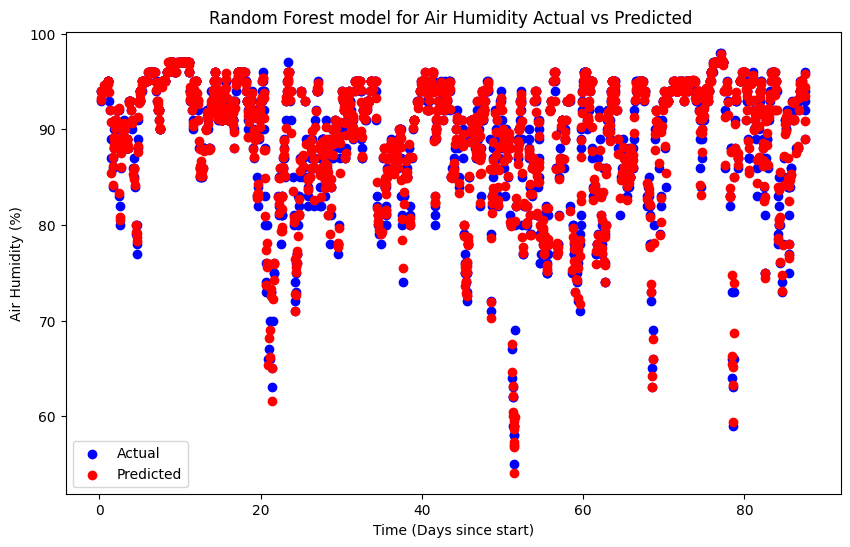

In [24]:
# the Random Forest model for Air Humidity
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt



# Load data
data = pd.read_json('wsense-thermocable.json')  # Update the path to your JSON file

# Convert 'time' to numerical feature, e.g., day of the month
#data['day'] = pd.to_datetime(data['time']).dt.day
data['time'] = pd.to_datetime(data['time'])
data['time'] = (data['time'] - data['time'].min()).dt.total_seconds()/(3600.0 *24)
# Drop rows with NaN values in 'waterLevel'
data = data.dropna(subset=['airHumidity'])

# Define features and target variable
X = data[['time']]  # Now we use 'day' instead of 'hour'
y = data['airHumidity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
#n_estimators= The required number of trees in the Random Forest. The default value is 100. We can choose any number but need to take care of the overfitting issue.
#criterion= It is a function to analyze the accuracy of the split. Here we have taken "entropy" for the information gain.
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
#print(f"Predict on the trained set: {X_train},{y_train}")
# Predict on the testing set
y_pred = random_forest_model.predict(X_test)

# Calculate the mean squared error (MSE)
#MSE measures the average squared difference between the actual value and the estimated values.
#The lowest possible value for MSE is 0, which would indicate that the model's predictions are perfect and match the actual values
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Calculate the root mean squared error (RMSE) for a more interpretable metric
#rmse = np.sqrt(mse)
#print(f"Root Mean Squared Error: {rmse}")

# After your model has predicted
# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 6))
#plt.scatter(X_train['time'], y_train, color='blue', label='Actual'),#med den
plt.scatter(X_test['time'], y_test, color='blue', label='Actual')#med den
plt.scatter(X_test['time'], y_pred, color='red', label='Predicted')
plt.xlabel('Time (Days since start)')
plt.ylabel('Air Humidity (%)')
plt.title('Random Forest model for Air Humidity Actual vs Predicted ')
plt.legend()
plt.show()

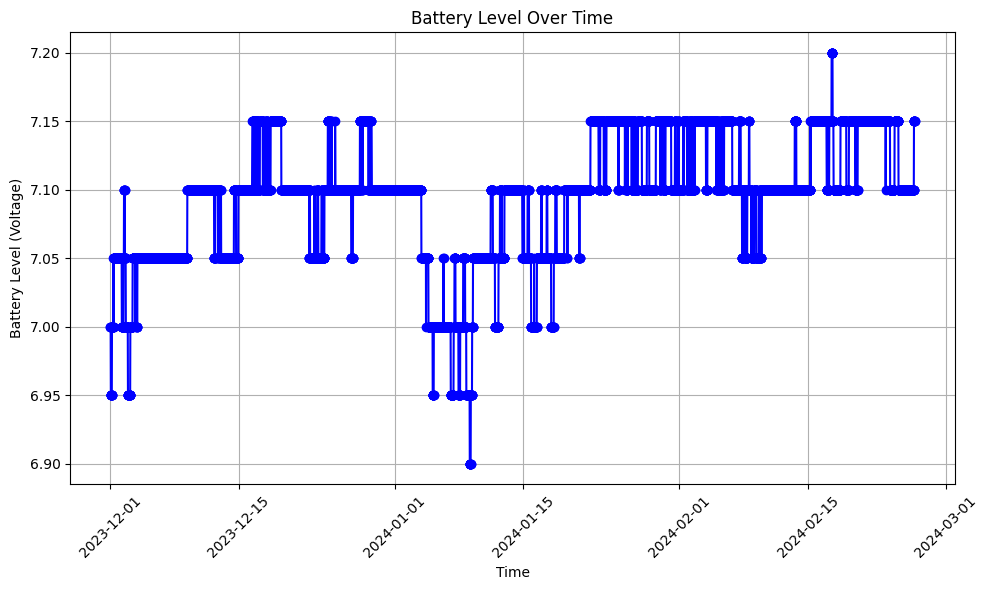

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Load and clean your data here
# Assuming 'data' is your cleaned DataFrame that already has null values removed and necessary columns retained

# Ensure the 'time' column is in datetime format for better plotting
data['time'] = pd.to_datetime(data['time'])

# Start plotting
plt.figure(figsize=(10, 6))
plt.plot(data['time'], data['batteryLevel'], marker='o', linestyle='-', color='blue')
plt.title('Battery Level Over Time')
plt.xlabel('Time')
plt.ylabel('Battery Level (Voltage)')
plt.xticks(rotation=45)
plt.grid(True)  # Optional: Adds a grid for better readability
plt.tight_layout()
plt.show()

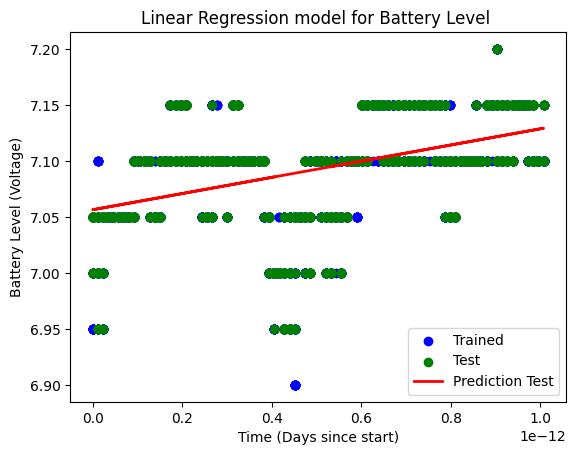

In [25]:
#Create a linear regression model for Battery Level
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Convert 'time' to a numerical value (e.g., days since the first timestamp)
data['time'] = pd.to_datetime(data['time'])
data['time'] = (data['time'] - data['time'].min()).dt.total_seconds()/(3600.0 *24)

# Prepare the data for linear regression
X = data[['time']]  # Feature matrix
y = data['batteryLevel']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)
# Optional: Plot the results
#trained
plt.scatter(X_train, y_train, color='blue',label='Trained')#80%
#Test
plt.scatter(X_test, y_test, color='green',label='Test')#20%
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction Test')  # Predict
#plt.plot(X_train, x_pred, color='orange', linewidth=2,label='Prediction Trained')#predict
plt.xlabel('Time (Days since start)')
plt.ylabel('Battery Level (Voltage)')
plt.title('Linear Regression model for Battery Level ')
plt.legend()# This will show the legend
plt.show()

Mean Squared Error: 6.923853211008839e-05


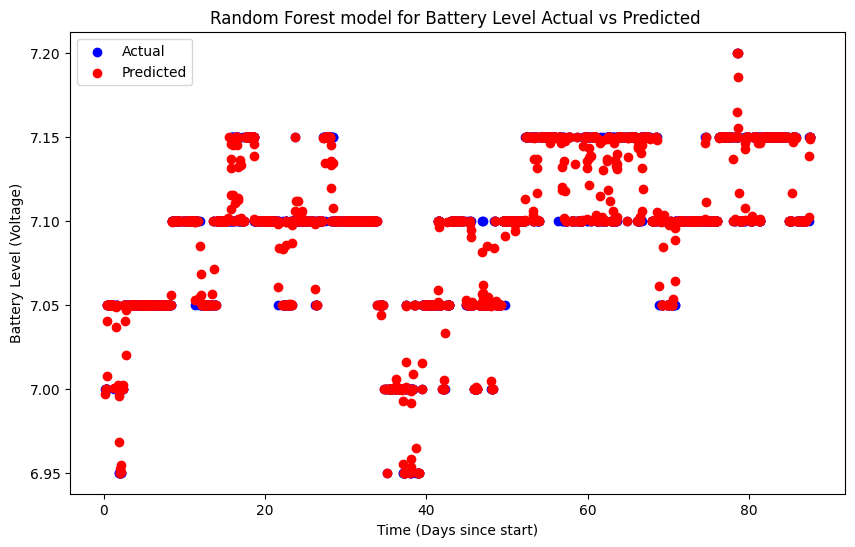

In [27]:
# the Random Forest model for Battery Level
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt



# Load data
data = pd.read_json('wsense-thermocable.json')  # Update the path to your JSON file

# Convert 'time' to numerical feature, e.g., day of the month
#data['day'] = pd.to_datetime(data['time']).dt.day
data['time'] = pd.to_datetime(data['time'])
data['time'] = (data['time'] - data['time'].min()).dt.total_seconds()/(3600.0 *24)
# Drop rows with NaN values in 'waterLevel'
data = data.dropna(subset=['batteryLevel'])

# Define features and target variable
X = data[['time']]  # Now we use 'day' instead of 'hour'
y = data['batteryLevel']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
#n_estimators= The required number of trees in the Random Forest. The default value is 100. We can choose any number but need to take care of the overfitting issue.
#criterion= It is a function to analyze the accuracy of the split. Here we have taken "entropy" for the information gain.
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
#print(f"Predict on the trained set: {X_train},{y_train}")
# Predict on the testing set
y_pred = random_forest_model.predict(X_test)

# Calculate the mean squared error (MSE)
#MSE measures the average squared difference between the actual value and the estimated values.
#The lowest possible value for MSE is 0, which would indicate that the model's predictions are perfect and match the actual values
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Calculate the root mean squared error (RMSE) for a more interpretable metric
#rmse = np.sqrt(mse)
#print(f"Root Mean Squared Error: {rmse}")

# After your model has predicted
# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 6))
#plt.scatter(X_train['time'], y_train, color='blue', label='Actual'),#med den
plt.scatter(X_test['time'], y_test, color='blue', label='Actual')#med den
plt.scatter(X_test['time'], y_pred, color='red', label='Predicted')
plt.xlabel('Time (Days since start)')
plt.ylabel('Battery Level (Voltage)')
plt.title('Random Forest model for Battery Level Actual vs Predicted ')
plt.legend()
plt.show()